In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
anime = pd.read_csv(r"https://raw.githubusercontent.com/codeforcauseorg/ML-Bootcamp-July/master/datasets/recom/anime.csv")

In [3]:
anime.head()   #content based filtering

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating = pd.read_csv(r"https://raw.githubusercontent.com/codeforcauseorg/ML-Bootcamp-July/master/datasets/recom/rating.csv")

In [5]:
rating.head()    #colaborative filtering

,Unnamed: 0,user_id,anime_id,rating
0,2443027,23306,3503,7
1,4751250,45366,1190,-1
2,7694962,72305,5150,8
3,7066179,65975,6045,10
4,7198178,67151,3702,9


In [7]:
#We get the rows in anime having drama for creating a basic cluster.
items = np.array(anime.genre)

In [8]:
#To create the list of indices ie vals having drama in them
vals = [("Drama" in str(item)) for item in items]  

In [9]:
vals

[True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,


In [12]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [14]:
X = anime.loc[vals]  #to get the rows corresponding to vals. This is X ie training data.

In [16]:
X_mod = X[['episodes', 'rating', 'members']]   #to get the rows corresponding to vals' episodes, members, rating. This is X ie training data.

In [17]:
X_mod

,episodes,rating,members
0,1,9.37,200630
1,64,9.26,793665
5,10,9.15,93351
7,110,9.11,80679
10,24,9.06,456749
...,...,...,...
12017,1,5.72,4981
12071,3,5.61,654
12143,1,5.46,841
12203,2,5.23,4550


In [18]:
X_mod.describe()   #Here we dont have ratings of some members.

,rating,members
count,1977.000000,2016.000000
mean,6.977218,28900.097718
std,0.881088,71701.646529
min,3.330000,20.000000
25%,6.420000,443.750000
50%,7.020000,4079.000000
75%,7.560000,22722.500000
max,9.370000,896229.000000


In [19]:
#Representation of data
import seaborn as sns

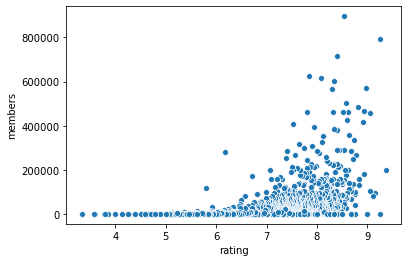

In [20]:
sns.scatterplot(X_mod.rating, X_mod.members)  #This is not a very good distribution.

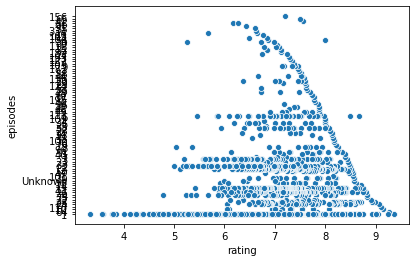

In [21]:
sns.scatterplot(X_mod.rating, X_mod.episodes) 

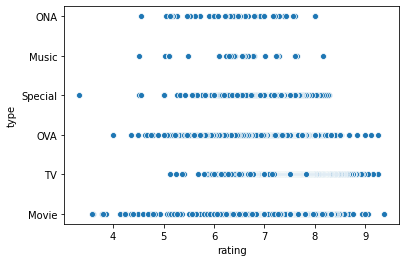

In [22]:
sns.scatterplot(X.rating, X.type)    #This is a good distribution data.

# In content based - 
If we watch 5-6 movies, then the average of features of that movie is your value. With the help of initial clustering, we can use KNN or any classification algorithm and find the cluster to which the point belongs to.   

# In case of Colaborative System -
We Create 2D lists for that ie name of movie, rating value of movie. This is a sparse list as somebody puts rating value for some other movie. In the above example len(rating) is very big, so it is not feasible to draw 2D arrays. 

In [23]:
len(rating)

3906868